In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100

from src.eda import Analysis, Visualizations

In [2]:
train_data = pd.read_pickle('data/df_income_learn.pkl')
test_data = pd.read_pickle('data/df_income_test.pkl')

df_income_learn = train_data.copy()
df_income_test = test_data.copy()

In [5]:
df_income_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145776 entries, 1 to 199522
Data columns (total 39 columns):
age                                          145776 non-null int64
class_of_worker                              145776 non-null object
education                                    145776 non-null object
wage_per_hour                                145776 non-null int64
enroll_in_edu_inst_last_wk                   145776 non-null object
marital_stat                                 145776 non-null object
major_industry_code                          145776 non-null object
major_occupation_code                        145776 non-null object
race                                         145776 non-null object
hispanic_origin                              145776 non-null object
sex                                          145776 non-null object
member_of_a_labor_union                      145776 non-null object
reason_for_unemployment                      145776 non-null object
full_or

In [6]:
df_income_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75428 entries, 0 to 99760
Data columns (total 39 columns):
age                                          75428 non-null int64
class_of_worker                              75428 non-null object
education                                    75428 non-null object
wage_per_hour                                75428 non-null int64
enroll_in_edu_inst_last_wk                   75428 non-null object
marital_stat                                 75428 non-null object
major_industry_code                          75428 non-null object
major_occupation_code                        75428 non-null object
race                                         75428 non-null object
hispanic_origin                              75428 non-null object
sex                                          75428 non-null object
member_of_a_labor_union                      75428 non-null object
reason_for_unemployment                      75428 non-null object
full_or_part_time_empl

### Next step is to examine the continuous and categorical variables.

#### Continuous Variables

In [8]:
# There are 7 continuous variables
continuous_vars = ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'num_persons_worked_for_employer', 'weeks_worked_in_year']

In [9]:
# Pop the continuous variables so they are in their own dataframe.
df_income_learn_cont = Analysis(df_income_learn, continuous_vars).pop_columns()
df_income_learn_cont.head()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
1,58,0,0,0,0,1,52
2,18,0,0,0,0,0,0
5,48,1200,0,0,0,1,52
6,42,0,5178,0,0,6,52
7,28,0,0,0,0,4,30


In [10]:
# These should now only be the categorical variables.
df_income_learn.head()

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,year,income
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,0
2,Not in universe,high_school_no_graduate,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,95,0
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,95,0
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,0
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95,0


In [11]:
# Do the same for test data.
df_income_test_cont = Analysis(df_income_test, continuous_vars).pop_columns()

In [12]:
# Pop labels from train and test as well.
income_learn_label = Analysis(df_income_learn, ['income']).pop_columns()
income_test_label = Analysis(df_income_test, ['income']).pop_columns()

In [13]:
income_learn_label.head()

,income
1,0
2,0
5,0
6,0
7,0


In [9]:
# These should now only be the categorical variables without income.
df_income_learn.head()

,class_of_worker,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,year
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94
2,Not in universe,high_school_no_graduate,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,?,?,?,Not in universe under 1 year old,?,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,95
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,95
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95


#### Visualizations on train continuous data.

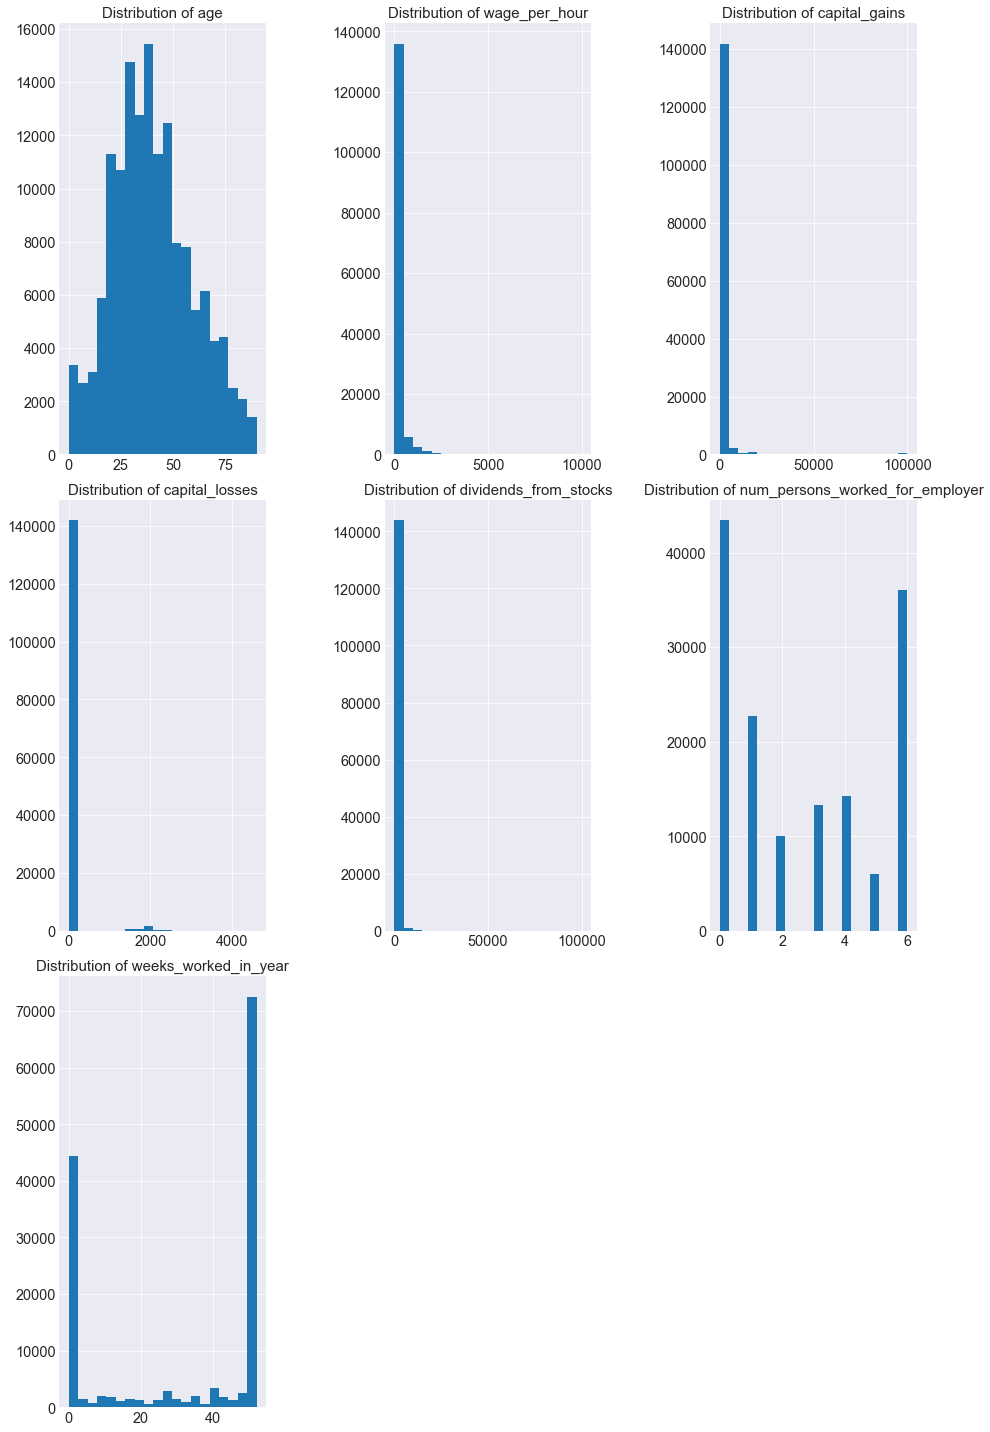

In [10]:
# Distributions of continuous variables
Visualizations(df_income_learn_cont, continuous_vars).histogram()

#### Outlier Analysis

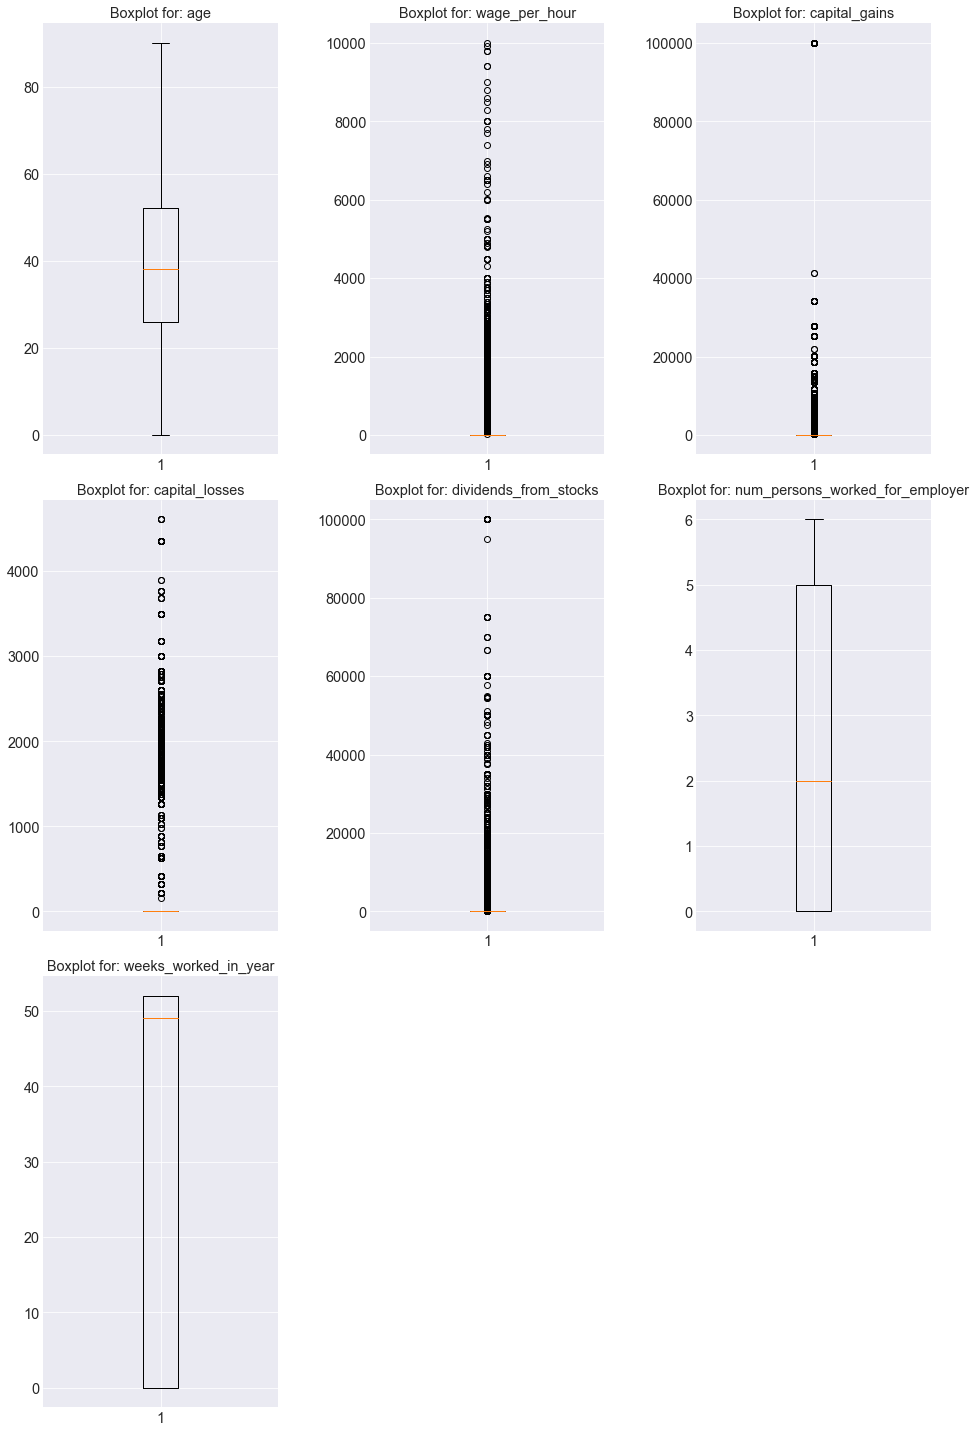

In [11]:
Visualizations(df_income_learn_cont, continuous_vars).boxplots()

In [18]:
# Replace these outliers with means.
outlier_variables = ['wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks']

for column in outlier_variables:
    Analysis(df_income_learn_cont, column).replace_outliers_with_means()

In [19]:
# Make sure outliers have been addressed.
df_income_learn_cont.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
count,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000,145776.000000
mean,40.049946,5.879239,29.990881,1.366129,26.693933,2.648776,31.365046
std,19.047693,20.282300,130.076018,8.235434,76.017498,2.395149,23.437004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,49.000000
75%,52.000000,0.000000,0.000000,0.000000,0.000000,5.000000,52.000000
max,90.000000,75.850915,594.886230,51.011463,268.787709,6.000000,52.000000


In [20]:
# Do the same with test data.
for column in outlier_variables:
    Analysis(df_income_test_cont, column).replace_outliers_with_means()
df_income_test_cont.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
count,75428.000000,75428.000000,75428.000000,75428.000000,75428.000000,75428.000000,75428.000000
mean,39.902927,5.332528,27.660454,1.201733,24.818612,2.573686,30.469454
std,19.453138,18.859399,121.604819,7.459755,71.612729,2.401099,23.651942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,47.000000
75%,53.000000,0.000000,0.000000,0.000000,0.000000,5.000000,52.000000
max,90.000000,72.031142,563.113777,47.507517,254.493809,6.000000,52.000000


#### Correlations

In [15]:
# Correlations with continuous variables and income
df_income_learn_cont_with_label = pd.concat([df_income_learn_cont, income_learn_label], axis=1)
df_income_learn_cont_with_label.corr()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,income
age,1.000000,-0.050088,0.101622,0.035851,0.227625,-0.098116,-0.046860,0.099323
wage_per_hour,-0.050088,1.000000,-0.012916,-0.007405,-0.037282,0.164223,0.170289,-0.036978
capital_gains,0.101622,-0.012916,1.000000,-0.038247,0.097221,0.054292,0.080457,0.201572
capital_losses,0.035851,-0.007405,-0.038247,1.000000,0.049732,0.055886,0.071078,0.127893
dividends_from_stocks,0.227625,-0.037282,0.097221,0.049732,1.000000,0.016813,0.015953,0.248547
num_persons_worked_for_employer,-0.098116,0.164223,0.054292,0.055886,0.016813,1.000000,0.654361,0.172495
weeks_worked_in_year,-0.046860,0.170289,0.080457,0.071078,0.015953,0.654361,1.000000,0.217067
income,0.099323,-0.036978,0.201572,0.127893,0.248547,0.172495,0.217067,1.000000


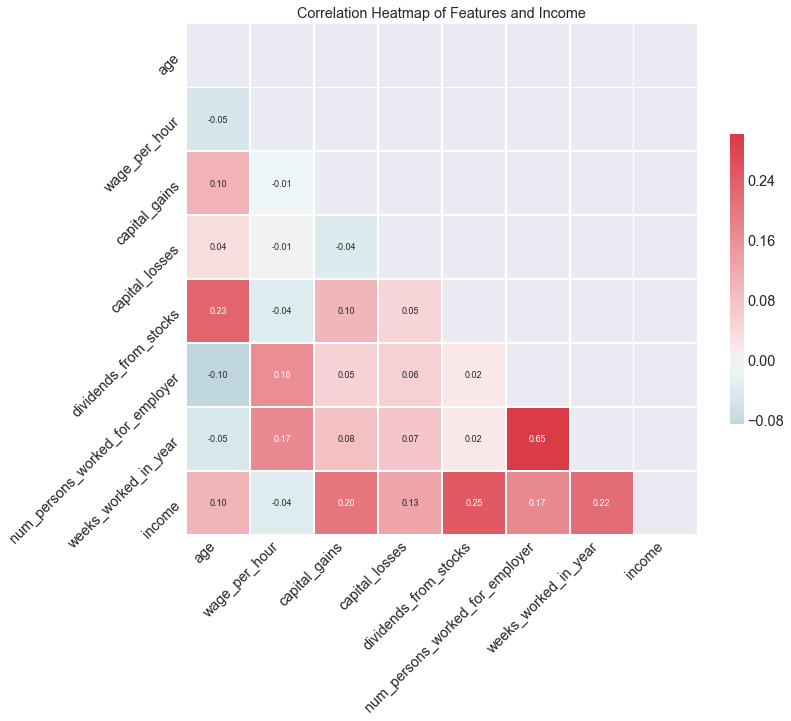

In [18]:
cont_vars_with_label = continuous_vars.append(income_learn_label)
Visualizations(df_income_learn_cont_with_label, continuous_vars).heatmap()

### Categorical Variables

In [19]:
df_income_learn.columns

Index(['class_of_worker', 'education', 'enroll_in_edu_inst_last_wk',
       'marital_stat', 'major_industry_code', 'major_occupation_code', 'race',
       'hispanic_origin', 'sex', 'member_of_a_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'tax_filer_stat', 'region_of_previous_residence',
       'state_of_previous_residence', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household',
       'migration_code-change_in_msa', 'migration_code-change_in_reg',
       'migration_code-move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'family_members_under_18',
       'country_of_birth_father', 'country_of_birth_mother',
       'country_of_birth_self', 'citizenship', 'own_business_or_self_employed',
       'fill_inc_questionnaire_for_veterans_admin', 'veterans_benefits',
       'year'],
      dtype='object')

In [20]:
# See values of the categorical variables
for column in df_income_learn:
    print(f"Unique values for {column}: {df_income_learn[column].unique()}")

Unique values for class_of_worker: [' Self-employed-not incorporated' ' Not in universe' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
Unique values for education: [' Some college but no degree' 'high_school_no_graduate'
 ' Bachelors degree(BA AB BS)' ' High school graduate' ' Children'
 ' Masters degree(MA MS MEng MEd MSW MBA)' 'up_to_6th_grade'
 ' Associates degree-academic program' ' 7th and 8th grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' Doctorate degree(PhD EdD)']
Unique values for enroll_in_edu_inst_last_wk: [' Not in universe' ' High school' ' College or university']
Unique values for marital_stat: [' Divorced' ' Never married' ' Married-civilian spouse present'
 ' Widowed' ' Separated' ' Married-spouse absent'
 ' Married-A F spouse present']
Unique values for major_industry_code: [' Construction' ' Not in universe or children' ' Entertainmen

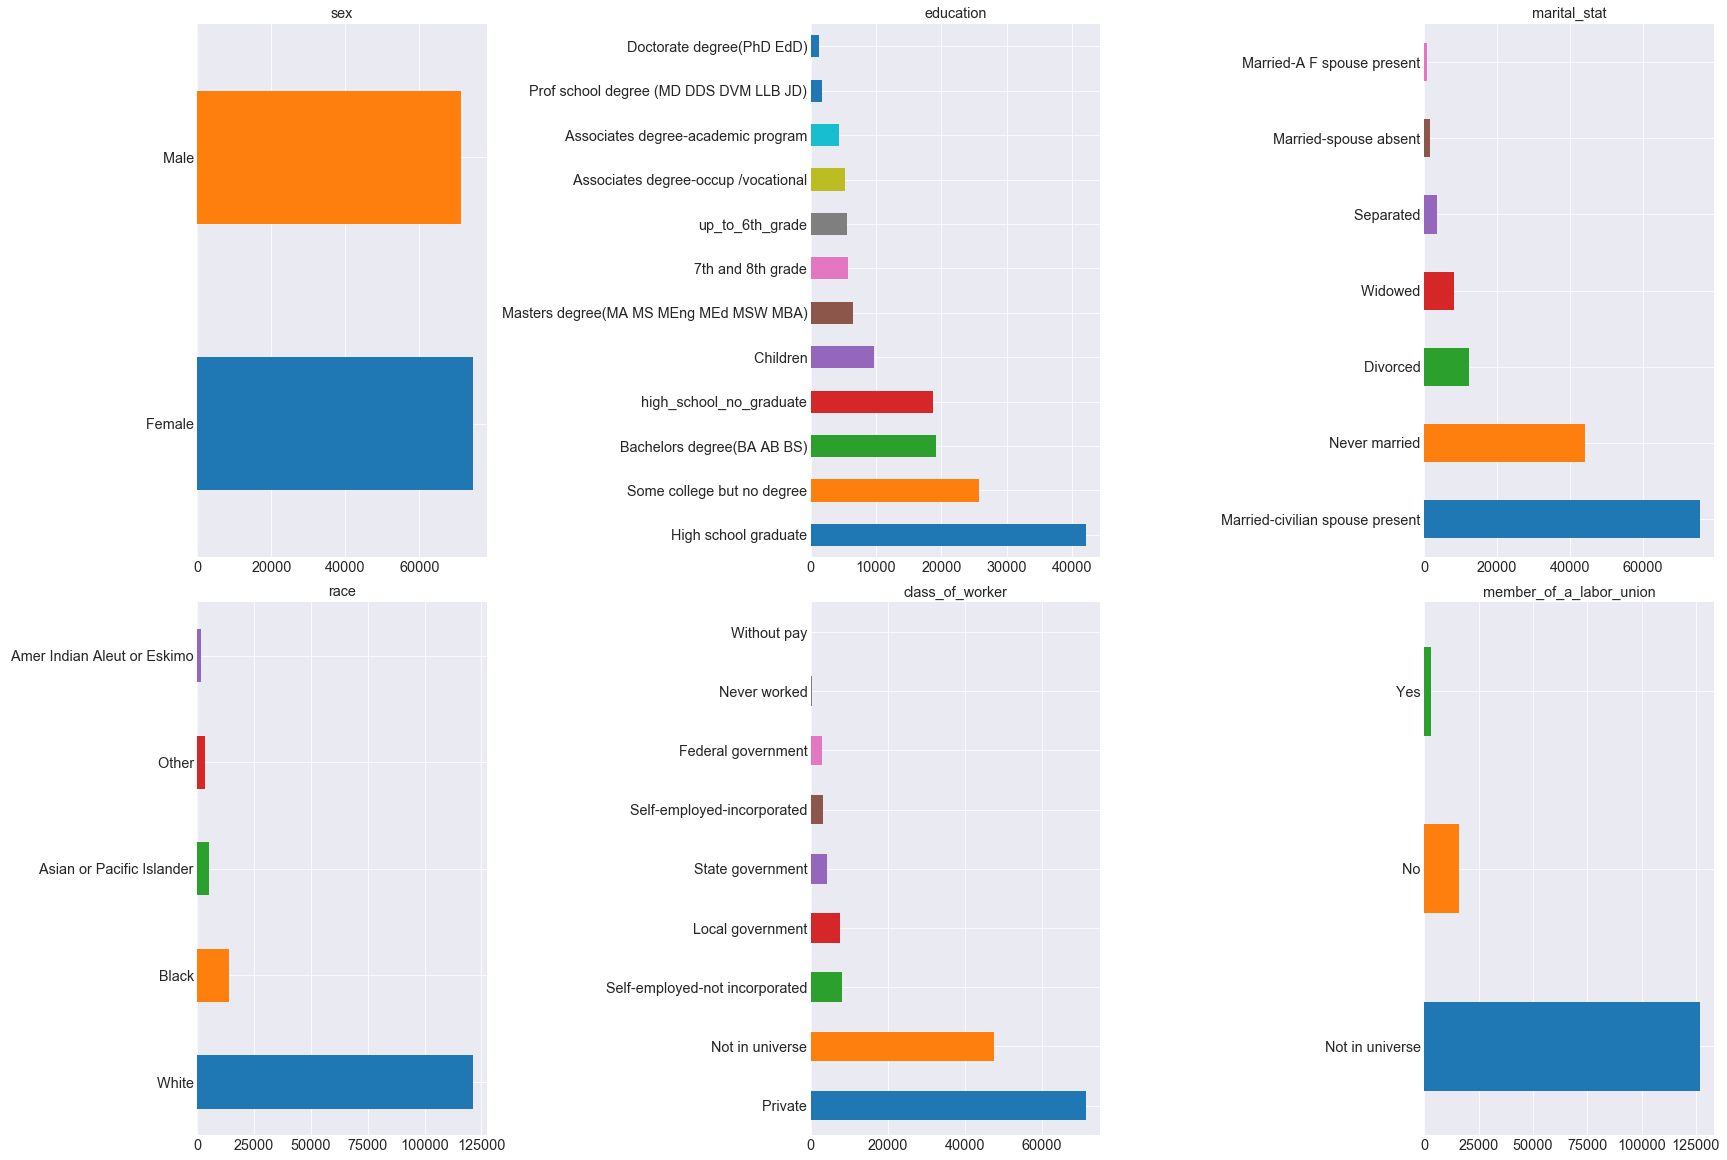

In [21]:
# Visualizing a few of the categorical variables
cat_vars = ['sex', 'education', 'marital_stat', 'race', 'class_of_worker', 'member_of_a_labor_union']
Visualizations(df_income_learn, cat_vars).categorical_bars()

In [21]:
# create dummy variables
df_income_learn_with_dummies = pd.get_dummies(df_income_learn.astype(str))
df_income_learn_with_dummies.head()

,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,major_industry_code_ Medical except hospital,major_industry_code_ Mining,major_industry_code_ Not in universe or children,major_industry_code_ Other professional services,major_industry_code_ Personal services except private HH,major_industry_code_ Private household services,major_industry_code_ Public administration,...,country_of_birth_self_ England,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_0,veterans_benefits_1,veterans_benefits_2,year_94,year_95
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [22]:
# same for test
df_income_test_with_dummies = pd.get_dummies(df_income_test.astype(str))
df_income_test_with_dummies.head()

,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,major_industry_code_ Medical except hospital,major_industry_code_ Mining,major_industry_code_ Not in universe or children,major_industry_code_ Other professional services,major_industry_code_ Personal services except private HH,major_industry_code_ Private household services,major_industry_code_ Public administration,...,country_of_birth_self_ England,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_0,veterans_benefits_1,veterans_benefits_2,year_94,year_95
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [27]:
list(set([col for col in df_income_learn_with_dummies.columns]) - set([col for col in df_income_test_with_dummies.columns]))

['detailed_household_and_family_stat_ Grandchild <18 ever marr not in subfamily']

In [24]:
df_merged_learn = pd.concat([df_income_learn_cont, df_income_learn_with_dummies], axis=1)
df_merged_test = pd.concat([df_income_test_cont, df_income_test_with_dummies], axis=1)

In [25]:
# Merge with label
df_merged_learn_with_label = pd.concat([df_merged_learn, income_learn_label], axis=1)
df_merged_test_with_label = pd.concat([df_merged_test, income_test_label], axis=1)

In [26]:
df_merged_learn_with_label.head()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,...,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_0,veterans_benefits_1,veterans_benefits_2,year_94,year_95,income
1,58,0.000000,0.00000,0.0,0.0,1,52,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0
2,18,0.000000,0.00000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
5,48,75.850915,0.00000,0.0,0.0,1,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:
df_merged_test_with_label.head()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,education_ 7th and 8th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,education_high_school_no_graduate,education_up_to_6th_grade,enroll_in_edu_inst_last_wk_ College or university,enroll_in_edu_inst_last_wk_ High school,enroll_in_edu_inst_last_wk_ Not in universe,marital_stat_ Divorced,marital_stat_ Married-A F spouse present,marital_stat_ Married-civilian spouse present,marital_stat_ Married-spouse absent,marital_stat_ Never married,marital_stat_ Separated,marital_stat_ Widowed,major_industry_code_ Agriculture,major_industry_code_ Armed Forces,major_industry_code_ Business and repair services,major_industry_code_ Communications,major_industry_code_ Construction,major_industry_code_ Education,major_industry_code_ Entertainment,major_industry_code_ Finance insurance and real estate,major_industry_code_ Forestry and fisheries,major_industry_code_ Hospital services,major_industry_code_ Manufacturing-durable goods,major_industry_code_ Manufacturing-nondurable goods,...,country_of_birth_self_ France,country_of_birth_self_ Germany,country_of_birth_self_ Greece,country_of_birth_self_ Guatemala,country_of_birth_self_ Haiti,country_of_birth_self_ Holand-Netherlands,country_of_birth_self_ Honduras,country_of_birth_self_ Hong Kong,country_of_birth_self_ Hungary,country_of_birth_self_ India,country_of_birth_self_ Iran,country_of_birth_self_ Ireland,country_of_birth_self_ Italy,country_of_birth_self_ Jamaica,country_of_birth_self_ Japan,country_of_birth_self_ Laos,country_of_birth_self_ Mexico,country_of_birth_self_ Nicaragua,country_of_birth_self_ Outlying-U S (Guam USVI etc),country_of_birth_self_ Panama,country_of_birth_self_ Peru,country_of_birth_self_ Philippines,country_of_birth_self_ Poland,country_of_birth_self_ Portugal,country_of_birth_self_ Puerto-Rico,country_of_birth_self_ Scotland,country_of_birth_self_ South Korea,country_of_birth_self_ Taiwan,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States,own_business_or_self_employed_0,own_business_or_self_employed_1,own_business_or_self_employed_2,fill_inc_questionnaire_for_veterans_admin_ No,fill_inc_questionnaire_for_veterans_admin_ Not in universe,fill_inc_questionnaire_for_veterans_admin_ Yes,veterans_benefits_0,veterans_benefits_1,veterans_benefits_2,year_94,year_95,income
0,38,0.0,0.0,0.0,0.000000,4,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,44,0.0,0.0,0.0,254.493809,1,26,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,35,0.0,0.0,0.0,0.000000,5,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
# pickle new dataframes
df_merged_learn_with_label.to_pickle('data/df_merged_learn.pkl')
df_merged_test_with_label.to_pickle('data/df_merged_test.pkl')

Now the data is ready for modeling.